# Predicting Shelter Animal Outcomes
https://github.com/andraszsom/kaggle-for-the-paws/blob/master/kaggle_for_the_paws.ipynb

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
}else{
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for thie IPython notebook is by default hidden for easier reading. 
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
''')

## Merging given data with official data

In [2]:
# match animals in train to the shelter database
import pandas as pd
import numpy as np

print 'if you rerun this cell, dont forget to remove one of the Oso lines - A672744'


df_train = pd.read_csv('data/train.csv')

df_intake = pd.read_csv("data/Austin_Animal_Center_Intakes.csv")
df_intake.drop('Found Location', axis=1, inplace=True)

## merge train and intake dfs
df_train_merged = df_train.merge(df_intake,on=['AnimalID'],how='left').drop_duplicates()
# will add the proper value later
df_train_merged['MultipleIntakes'] = np.zeros(len(df_train_merged)) + 1

print len(df_train)
print len(df_train_merged)

# animals with multiple occurrences are animals that returned to the shelter more than once. 
# Remove these multiple lines. The line I keep is the one directly before the outcome datetime.

multi_IDs = df_train_merged['AnimalID'].value_counts().to_dict()

for key in multi_IDs:
    if multi_IDs[key] > 1:
        
        
        multi_animal = df_train_merged[df_train_merged['AnimalID'] == key]
        outcome_time = pd.to_datetime(multi_animal['DateTime_x']).iloc[0]
        intake_times = pd.to_datetime(multi_animal['DateTime_y'])
        # number of intakes before outcome_time
        nr_intakes = len(intake_times[intake_times < outcome_time])
        # update MultipleIntakes
        df_train_merged.set_value(df_train_merged['AnimalID'] == key,'MultipleIntakes',nr_intakes) 
        # the income time before the outcome time
        last_intake = intake_times[intake_times < outcome_time].max()
        
        
        if key == 'A672744':
            print key
            print outcome_time
            print intake_times
        
        
        # remove other lines
        df_train_merged.drop(df_train_merged[(df_train_merged['AnimalID'] == key) & \
                (pd.to_datetime(df_train_merged[df_train_merged['AnimalID'] == key]['DateTime_y']) != last_intake)].index,inplace=True)
        
        
        
print len(df_train_merged)

print df_train_merged['AnimalID'].value_counts()

df_train_merged.to_csv('data/train_merged.csv',index=False)

if you rerun this cell, dont forget to remove one of the Oso lines - A672744
26729
29306
A672744
2014-04-17 17:09:00
420   2014-02-17 17:10:00
421   2014-02-17 17:10:00
Name: DateTime_y, dtype: datetime64[ns]
26730
A672744    2
A705677    1
A717470    1
A697150    1
A697151    1
A697156    1
A720296    1
A717476    1
A666368    1
A698837    1
A717475    1
A717472    1
A678976    1
A670388    1
A679376    1
A666361    1
A666360    1
A666362    1
A687530    1
A666364    1
A698835    1
A693172    1
A661868    1
A666457    1
A679373    1
A676641    1
A676642    1
A676644    1
A705037    1
A682210    1
          ..
A688453    1
A688452    1
A686611    1
A685023    1
A685021    1
A685395    1
A566868    1
A694583    1
A694584    1
A663627    1
A694589    1
A663623    1
A685399    1
A673459    1
A702050    1
A674098    1
A672499    1
A718752    1
A688129    1
A677216    1
A718750    1
A677219    1
A702052    1
A674094    1
A674095    1
A674096    1
A679457    1
A640416    1
A719083    1
A7123

In [3]:
# match animals in test to the shelter database to get the animal IDs
import pandas as pd

df_test = pd.read_csv('data/test.csv')

df_test['DateTime_conv'] = pd.to_datetime(df_test['DateTime'])

df_intake = pd.read_csv("data/Austin_Animal_Center_Intakes.csv")
df_intake.drop('Found Location', axis=1, inplace=True)

df_outcome = pd.read_csv("data/Austin_Animal_Center_Outcomes.csv")
df_outcome['DateTime_conv'] = pd.to_datetime(df_outcome['DateTime'])

# first find the animalID for the test animals
df_test_merged = df_test.merge(df_outcome,on=['DateTime_conv','AnimalType','Breed','Color','AgeuponOutcome','SexuponOutcome'],how='left').drop_duplicates()

# duplicate lines here are usually puppies and kitties from the same litter borned in the shelter.

print len(df_test)
print len(df_test_merged)
print df_test_merged['AnimalID'].isnull().sum()
print np.sum(df_test_merged['ID'].value_counts())
print df_test_merged['ID'].value_counts()
print np.sum(df_test_merged['ID'].value_counts())

# remove duplicate lines

multi_IDs = df_test_merged['ID'].value_counts().to_dict()

for key in multi_IDs:
    if multi_IDs[key] > 1:
        animalIDs = df_test_merged[df_test_merged['ID'] == key]['AnimalID']
        
        # drop all duplicates except for the first
        for i in animalIDs[1:]:
            df_test_merged.drop(df_test_merged[(df_test_merged['ID'] == key) & \
                (df_test_merged['AnimalID'] == i)].index,inplace=True)
        

multi_IDs = df_test_merged['ID'].value_counts().to_dict()


#print df_test_merged['ID'].value_counts()
print df_test_merged['AnimalID'].value_counts()
print len(df_test_merged)

# remove unnecessary columns and rename a few columns for consistency
df_test_merged.drop('DateTime_conv', axis=1, inplace=True)
df_test_merged.drop('Name_y', axis=1, inplace=True)
df_test_merged.drop('DateTime_y', axis=1, inplace=True)
df_test_merged.drop('MonthYear', axis=1, inplace=True)
df_test_merged.drop('Outcome Type', axis=1, inplace=True)
df_test_merged.drop('Outcome Subtype', axis=1, inplace=True)
df_test_merged.rename(columns={'DateTime_x': 'DateTime','Name_x': 'Name'}, inplace=True)
df_test_merged.to_csv('data/test_withIDs.csv', index=False)

11456
12126
0
12126
1764     9
7992     9
4251     9
2058     6
5948     6
6363     6
4862     6
3842     5
5570     4
718      4
7498     4
2621     4
3926     4
2279     4
201      4
2338     4
4149     4
4344     4
5150     4
4240     4
1254     4
7431     4
2380     4
11368    4
163      4
3300     4
785      4
4588     4
7510     4
5376     4
        ..
10736    1
4591     1
6638     1
493      1
2540     1
8681     1
10728    1
4583     1
4607     1
10752    1
8705     1
2564     1
8729     1
10776    1
4631     1
6678     1
533      1
2580     1
8721     1
10768    1
4623     1
6670     1
525      1
2572     1
8713     1
10760    1
4615     1
6662     1
517      1
2049     1
Name: ID, Length: 11456, dtype: int64
12126
A682479    3
A709522    3
A707861    3
A713942    3
A711300    3
A705630    3
A710687    3
A709839    3
A710035    2
A716853    2
A683545    2
A708807    2
A704610    2
A702347    2
A686948    2
A667274    2
A708886    2
A682576    2
A686145    2
A687501    2
A6810

In [4]:
# merge test_withIDs with the shelter's income data

# match animals in train to the shelter database
import pandas as pd

df_test = pd.read_csv('data/test_withIDs.csv')

df_intake = pd.read_csv("data/Austin_Animal_Center_Intakes.csv")
df_intake.drop('Found Location', axis=1, inplace=True)

## merge test and intake dfs
df_test_merged = df_test.merge(df_intake,on=['AnimalID'],how='left').drop_duplicates()
# will add the proper value later
df_test_merged['MultipleIntakes'] = np.zeros(len(df_test_merged)) + 1

print len(df_test)
print len(df_test_merged)

multi_IDs = df_test_merged['ID'].value_counts().to_dict()

for key in multi_IDs:
    if multi_IDs[key] > 1:
        
        
        multi_animal = df_test_merged[df_test_merged['ID'] == key]
        outcome_time = pd.to_datetime(multi_animal['DateTime_x']).iloc[0]
        intake_times = pd.to_datetime(multi_animal['DateTime_y'])
        # number of intakes before outcome_time
        nr_intakes = len(intake_times[intake_times < outcome_time])
        # update MultipleIntakes
        df_test_merged.set_value(df_test_merged['ID'] == key,'MultipleIntakes',nr_intakes) 
        # the income time before the outcome time
        last_intake = intake_times[intake_times < outcome_time].max()
        
        # remove other lines
        df_test_merged.drop(df_test_merged[(df_test_merged['ID'] == key) & \
                (pd.to_datetime(df_test_merged[df_test_merged['ID'] == key]['DateTime_y']) != last_intake)].index,inplace=True)
        
        
        
print len(df_test_merged)

print df_test_merged['AnimalID'].value_counts()
print df_test_merged['ID'].value_counts()

df_test_merged.to_csv('data/test_merged.csv', index=False)

11456
12601
11456
A682479    3
A709522    3
A707861    3
A713942    3
A711300    3
A705630    3
A710687    3
A709839    3
A710035    2
A716853    2
A683545    2
A708807    2
A704610    2
A702347    2
A686948    2
A667274    2
A708886    2
A682576    2
A686145    2
A687501    2
A681040    2
A702817    2
A705372    2
A665127    2
A704183    2
A701498    2
A712369    2
A701613    2
A700786    2
A677632    2
          ..
A688426    1
A677999    1
A671693    1
A701195    1
A681863    1
A718153    1
A666580    1
A692851    1
A692853    1
A709140    1
A653637    1
A696623    1
A693585    1
A693583    1
A693852    1
A680440    1
A673147    1
A379998    1
A670297    1
A707346    1
A692854    1
A707347    1
A707344    1
A711395    1
A704273    1
A707340    1
A681465    1
A680990    1
A692855    1
A720044    1
Name: AnimalID, Length: 11376, dtype: int64
2047     1
3307     1
3339     1
1290     1
7433     1
5384     1
9478     1
3331     1
1282     1
7425     1
5376     1
9470     1
3323     1
12

In [5]:
# check what animals are in the shelter on each day within the period of the database.
import pandas as pd
import numpy as np
import datetime
import collections
import os

breeds = ['Blue Lacy','Queensland Heeler','Rhod Ridgeback','Retriever','Chinese Sharpei','Black Mouth Cur','Catahoula','Staffordshire','Affenpinscher','Afghan Hound','Airedale Terrier','Akita','Australian Kelpie','Alaskan Malamute','English Bulldog','American Bulldog','American English Coonhound','American Eskimo Dog (Miniature)','American Eskimo Dog (Standard)','American Eskimo Dog (Toy)','American Foxhound','American Hairless Terrier','American Staffordshire Terrier','American Water Spaniel','Anatolian Shepherd Dog','Australian Cattle Dog','Australian Shepherd','Australian Terrier','Basenji','Basset Hound','Beagle','Bearded Collie','Beauceron','Bedlington Terrier','Belgian Malinois','Belgian Sheepdog','Belgian Tervuren','Bergamasco','Berger Picard','Bernese Mountain Dog','Bichon Fris_','Black and Tan Coonhound','Black Russian Terrier','Bloodhound','Bluetick Coonhound','Boerboel','Border Collie','Border Terrier','Borzoi','Boston Terrier','Bouvier des Flandres','Boxer','Boykin Spaniel','Briard','Brittany','Brussels Griffon','Bull Terrier','Bull Terrier (Miniature)','Bulldog','Bullmastiff','Cairn Terrier','Canaan Dog','Cane Corso','Cardigan Welsh Corgi','Cavalier King Charles Spaniel','Cesky Terrier','Chesapeake Bay Retriever','Chihuahua','Chinese Crested Dog','Chinese Shar Pei','Chinook','Chow Chow',"Cirneco dell'Etna",'Clumber Spaniel','Cocker Spaniel','Collie','Coton de Tulear','Curly-Coated Retriever','Dachshund','Dalmatian','Dandie Dinmont Terrier','Doberman Pinsch','Doberman Pinscher','Dogue De Bordeaux','English Cocker Spaniel','English Foxhound','English Setter','English Springer Spaniel','English Toy Spaniel','Entlebucher Mountain Dog','Field Spaniel','Finnish Lapphund','Finnish Spitz','Flat-Coated Retriever','French Bulldog','German Pinscher','German Shepherd','German Shorthaired Pointer','German Wirehaired Pointer','Giant Schnauzer','Glen of Imaal Terrier','Golden Retriever','Gordon Setter','Great Dane','Great Pyrenees','Greater Swiss Mountain Dog','Greyhound','Harrier','Havanese','Ibizan Hound','Icelandic Sheepdog','Irish Red and White Setter','Irish Setter','Irish Terrier','Irish Water Spaniel','Irish Wolfhound','Italian Greyhound','Japanese Chin','Keeshond','Kerry Blue Terrier','Komondor','Kuvasz','Labrador Retriever','Lagotto Romagnolo','Lakeland Terrier','Leonberger','Lhasa Apso','L_wchen','Maltese','Manchester Terrier','Mastiff','Miniature American Shepherd','Miniature Bull Terrier','Miniature Pinscher','Miniature Schnauzer','Neapolitan Mastiff','Newfoundland','Norfolk Terrier','Norwegian Buhund','Norwegian Elkhound','Norwegian Lundehund','Norwich Terrier','Nova Scotia Duck Tolling Retriever','Old English Sheepdog','Otterhound','Papillon','Parson Russell Terrier','Pekingese','Pembroke Welsh Corgi','Petit Basset Griffon Vend_en','Pharaoh Hound','Plott','Pointer','Polish Lowland Sheepdog','Pomeranian','Standard Poodle','Miniature Poodle','Toy Poodle','Portuguese Podengo Pequeno','Portuguese Water Dog','Pug','Puli','Pyrenean Shepherd','Rat Terrier','Redbone Coonhound','Rhodesian Ridgeback','Rottweiler','Russell Terrier','St. Bernard','Saluki','Samoyed','Schipperke','Scottish Deerhound','Scottish Terrier','Sealyham Terrier','Shetland Sheepdog','Shiba Inu','Shih Tzu','Siberian Husky','Silky Terrier','Skye Terrier','Sloughi','Smooth Fox Terrier','Soft-Coated Wheaten Terrier','Spanish Water Dog','Spinone Italiano','Staffordshire Bull Terrier','Standard Schnauzer','Sussex Spaniel','Swedish Vallhund','Tibetan Mastiff','Tibetan Spaniel','Tibetan Terrier','Toy Fox Terrier','Treeing Walker Coonhound','Vizsla','Weimaraner','Welsh Springer Spaniel','Welsh Terrier','West Highland White Terrier','Whippet','Wire Fox Terrier','Wirehaired Pointing Griffon','Wirehaired Vizsla','Xoloitzcuintli','Yorkshire Terrier', 'Pit Bull', 'American Pit Bull Terrier', 'Angora', 'Siamese', 'Russian Blue', 'Dogo Argentino', 'English Pointer', 'Chesa Bay Retr', 'Manx', 'Maine Coon', 'Burmese', 'Bruss Griffon', 'Bengal', 'Bichon Frise', 'Old English Bulldog', 'Carolina Dog', 'German Pointer', 'Himalayan', 'Ragdoll', 'Boykin Span', 'Schnauzer Giant', 'Alaskan Husky', 'American Eskimo', 'Landseer', 'Bombay', 'Persian', 'Cavalier Span', 'Podengo Pequeno', 'Cornish Rex', 'Balinese', 'English Coonhound', 'Jindo', 'Javanese', 'Picardy Sheepdog', 'Patterdale Terr', 'Germaned Pointer', 'Treeing Tennesse Brindle', 'Japanese Bobtail', 'Pbgv', 'Glen Of Imaal', 'Pixiebob', 'Presa Canario', 'Chinese Crested', 'Bedlington Terr', 'Feist', 'Tonkinese', 'Entlebucher', 'Sphynx', 'Ocicat', 'Abyssinian', 'Munchkin', 'Turkish Van', 'Hovawart', 'Norwegian Forest Cat', 'Cymric', 'Port Water Dog', 'Treeing Cur', 'Spanish Mastiff', 'Lowchen', 'Havana Brown', 'Scottish Fold', 'Coton De Tulear', 'Dachshund Stan', 'Dandie Dinmont', 'Chartreux', 'Eng Toy Spaniel', 'Turkish Angora']
groups = ['Herding','Herding','Hound','Sporting','Non-Sporting','Herding','Herding','Terrier','Toy','Hound','Terrier','Working','Working','Working','Non-Sporting','Non-Sporting','Hound','Non-Sporting','Non-Sporting','Toy','Hound','Terrier','Terrier','Sporting','Working','Herding','Herding','Terrier','Hound','Hound','Hound','Herding','Herding','Terrier','Herding','Herding','Herding','Herding','Herding','Working','Non-Sporting','Hound','Working','Hound','Hound','Working','Herding','Terrier','Hound','Non-Sporting','Herding','Working','Sporting','Herding','Sporting','Toy','Terrier','Terrier','Non-Sporting','Working','Terrier','Working','Working','Herding','Toy','Terrier','Sporting','Toy','Toy','Non-Sporting','Working','Non-Sporting','Hound','Sporting','Sporting','Herding','Non-Sporting','Sporting','Hound','Non-Sporting','Terrier','Working','Working','Working','Sporting','Hound','Sporting','Sporting','Toy','Herding','Sporting','Herding','Non-Sporting','Sporting','Non-Sporting','Working','Herding','Sporting','Sporting','Working','Terrier','Sporting','Sporting','Working','Working','Working','Hound','Hound','Toy','Hound','Herding','Sporting','Sporting','Terrier','Sporting','Hound','Toy','Toy','Non-Sporting','Terrier','Working','Working','Sporting','Sporting','Terrier','Working','Non-Sporting','Non-Sporting','Toy','Terrier','Working','Herding','Terrier','Toy','Terrier','Working','Working','Terrier','Herding','Hound','Non-Sporting','Terrier','Sporting','Herding','Hound','Toy','Terrier','Toy','Herding','Hound','Hound','Hound','Sporting','Herding','Toy','Non-Sporting','Non-Sporting','Toy','Hound','Working','Toy','Herding','Herding','Terrier','Hound','Hound','Working','Terrier','Working','Hound','Working','Non-Sporting','Hound','Terrier','Terrier','Herding','Non-Sporting','Toy','Working','Toy','Terrier','Hound','Terrier','Terrier','Herding','Sporting','Terrier','Working','Sporting','Herding','Working','Non-Sporting','Non-Sporting','Toy','Hound','Sporting','Sporting','Sporting','Terrier','Terrier','Hound','Terrier','Sporting','Sporting','Non-Sporting','Toy', 'Pit Bull', 'Pit Bull', 'Exotic','Siamese', 'Exotic', 
'Hound', 'Sporting', 'Sporting', 'Exotic', 'Exotic', 'Siamese', 'Toy', 'Exotic', 'Toy', 'Hound', 'Non-Sporting', 'Herding', 'Exotic', 'Exotic', 'Sporting', 'Herding', 'Sporting', 'Non-Sporting', 'Non-Sporting', 'Exotic', 'Exotic', 'Sporting', 'Toy', 'Exotic', 'Exotic', 'Hound', 'Sporting', 'Exotic', 'Herding', 'Terrier', 'Sporting', 'Hound', 'Exotic', 'Hound', 'Terrier', 'Exotic', 'Herding', 'Toy', 'Terrier', 'Sporting', 'Exotic', 'Herding', 'Exotic', 'Exotic', 'Exotic', 'Exotic', 'Exotic', 'Working', 'Exotic', 'Exotic', 'Working', 'Working', 'Hound', 'Non-Sporting', 'Exotic', 'Exotic', 'Toy', 'Non-Sporting', 'Terrier', 'Exotic', 'Toy', 'Exotic']

bdict = dict(zip(breeds, groups))

colors = ['Apricot', 'Black', 'Black Brindle', 'Black Smoke', 'Black Tiger', 'Blue', 'Blue Cream', \
                         'Blue Merle', 'Blue Smoke', 'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle', \
                         'Brown Tabby', 'Brown Tiger', 'Buff', 'Chocolate', 'Cream', 'Fawn', 'Gold', 'Gray', 'Liver', \
                         'Liver Tick', 'Orange', 'Pink', 'Red', 'Red Merle', 'Red Tick', 'Ruddy', 'Sable', 'Silver', \
                         'Tan', 'Tricolor', 'White', 'Yellow', 'Yellow Brindle','Gray Tiger',\
                         'Agouti', 'Apricot', 'Black', 'Black Smoke', 'Black Tabby', 'Black Tiger', 'Blue', \
                         'Blue Cream', 'Blue Point', 'Blue Smoke', 'Blue Tabby', 'Brown', 'Brown Tabby', 'Brown Tiger', \
                         'Buff', 'Calico', 'Calico Point', 'Chocolate', 'Chocolate Point', 'Cream', 'Cream Tabby', \
                         'Flame Point', 'Gray', 'Gray Tabby', 'Lilac Point', 'Lynx Point', 'Orange', 'Orange Tabby', \
                         'Orange Tiger', 'Pink', 'Seal Point', 'Silver', 'Silver Lynx Point', 'Silver Tabby', 'Tan', \
                         'Torbie', 'Tortie', 'Tortie Point', 'Tricolor', 'White', 'Yellow', 'Red', \
                         'Black Brindle','Fawn']

color_groups = ['Light','Dark','Dark/Medium','Dark','Dark/Medium','Medium','Medium/Light', \
                 'Light/Medium', 'Medium', 'Medium', 'Medium', 'Medium','Medium', 'Light/Medium', 
                 'Medium', 'Medium','Light','Dark','Light','Light/Dark','Medium','Medium','Medium',
                 'Light/Medium','Medium','Medium','Medium','Light/Medium','Light/Medium','Medium','Medium/Dark','Medium',
                 'Medium','Light/Medium/Dark','Light','Light','Light/Medium','Medium/Dark',\
                 'Medium','Light','Dark','Dark', 'Dark', 'Dark/Medium', 'Medium',\
                 'Medium/Light','Light/Medium','Medium','Medium/Light','Medium','Medium/Light','Medium',\
                 'Light','Light/Medium/Dark','Light/Medium/Dark','Dark','Medium/Dark','Light','Light/Medium',\
                 'Light','Medium','Medium/Light', 'Light/Medium','Light/Medium','Medium','Medium',\
                  'Medium','Medium','Light/Dark','Medium','Light/Medium','Medium/Dark', 'Medium',\
                 'Medium/Dark','Dark/Medium','Light/Dark','Light/Medium/Dark','Light','Light', 'Medium',\
                 'Dark/Medium','Light']

cdict = dict(zip(colors, color_groups))


def parse_breed_simplified(breedstring):
    if breedstring.endswith("Mix"):
        breedstring = breedstring[:-4]
    if breedstring.startswith("Domestic"):
        if "/" in breedstring:
            return breedstring.split("/")[0]
        return breedstring

    if breedstring == "American Shorthair":
        return "Domestic"

    if breedstring == "American Wirehair":
        return "Domestic"

    if breedstring == "British Shorthair":
        return "Domestic"

    if breedstring == 'Oriental Sh':
        return "Domestic"

    if "Unknown" in breedstring:
        return "Domestic"

    if "West Highland" in breedstring:
        return "Terrier"

    if "Hound" in breedstring:
        return "Hound"

    if "Terrier" in breedstring:
        return "Terrier"

    if breedstring.endswith("Terr"):
        return "Terrier"

    if "Shepherd" in breedstring:
        return "Herding"

    if "Exotic" in breedstring:
        return "Exotic"

    if "Devon Rex" in breedstring:
        return "Exotic"

    if "Snowshoe" in breedstring:
        return "Exotic"

    if "Mexican Hairless" in breedstring:
        return "Exotic"

    breedstring = breedstring.replace(' Shorthair','')
    breedstring = breedstring.replace(' Longhair','')
    breedstring = breedstring.replace(' Wirehair','')
    breedstring = breedstring.replace(' Rough','')
    breedstring = breedstring.replace(' Smooth Coat','')
    breedstring = breedstring.replace(' Smooth','')
    breedstring = breedstring.replace(' Black/Tan','')
    breedstring = breedstring.replace('Black/Tan ','')
    breedstring = breedstring.replace(' Flat Coat','')
    breedstring = breedstring.replace('Flat Coat ','')
    breedstring = breedstring.replace(' Coat','')

    if "/" in breedstring:
        breedstring = breedstring.split("/")[0]
    
    if breedstring in breeds:
        return bdict[breedstring]
    else:
        return 'Unknown'
    
def parse_color(colorstring):
    split = colorstring.split('/')
    string = ""
    #print split
    for j in split:
        #print '   ',j
        if j in colors:
            string += cdict[j]+'/'
        else:
            return 'Unknown'
    collect = []
    for j in string[:-1].split('/'):
        if j not in collect:
            collect.append(j)
    if len(collect) == 3:
        color_groups = 'Tricolor'
    else:
        color_groups = "/".join(collect)
    return color_groups

# intake and outcome datafiles from the shelter
df_intake = pd.read_csv("data/Austin_Animal_Center_Intakes.csv")
df_outcome = pd.read_csv("data/Austin_Animal_Center_Outcomes.csv")
# merge the two data frames
df_shelter = df_intake.merge(df_outcome,on='AnimalID',how='left').drop_duplicates()

# remove and rename columns
df_shelter.drop('MonthYear_x', axis=1, inplace=True)
df_shelter.drop('Found Location', axis=1, inplace=True)
df_shelter.drop('Name_y', axis=1, inplace=True)
df_shelter.drop('MonthYear_y', axis=1, inplace=True)
df_shelter.drop('Outcome Type', axis=1, inplace=True)
df_shelter.drop('Outcome Subtype', axis=1, inplace=True)
df_shelter.drop('AnimalType_y', axis=1, inplace=True)
df_shelter.drop('SexuponOutcome', axis=1, inplace=True)
df_shelter.drop('AgeuponOutcome', axis=1, inplace=True)
df_shelter.drop('Breed_y', axis=1, inplace=True)
df_shelter.drop('Color_y', axis=1, inplace=True)

df_shelter.rename(columns={'Name_x': 'Name', 'AnimalType_x': 'AnimalType',\
                              'Breed_x': 'Breed', 'Color_x': 'Color'}, inplace=True)

df_train = pd.read_csv("data/train_merged.csv")
df_test = pd.read_csv("data/test_merged.csv")

all_dates = pd.to_datetime(df_train['DateTime_x'].append(df_test['DateTime_x']))

# the unique dates
unique_dates = all_dates.map(lambda t: t.date()).unique()

ii = 0
for i in unique_dates:
    if ii%40 == 0:
        print ii

    # date at noon
    datetime = pd.to_datetime(i) + pd.Timedelta(hours=12)
    # collect the properties of the animals in the shelter at datetime
    ShelterDist = df_shelter.loc[(pd.to_datetime(df_shelter['DateTime_x']) < datetime)&\
                                 (pd.to_datetime(df_shelter['DateTime_y']) > datetime)]
    # drop the outcome datetime
    ShelterDist.drop('DateTime_y', axis=1, inplace=True)
    ShelterDist['Breed group'] = ShelterDist['Breed'].apply(lambda x:parse_breed_simplified(x))
    ShelterDist['Color group'] = ShelterDist['Color'].apply(lambda x:parse_color(x))
    
    # save the file
    ShelterDist.to_csv('shelter_dists/shelter_dist_'+str(i)+'.csv', index=False)

    ii = ii + 1

0


/Users/Walter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Walter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Walter/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


40
80
120
160
200
240
280
320
360
400
440
480
520
560
600
640
680
720
760
800
840


## Plotting

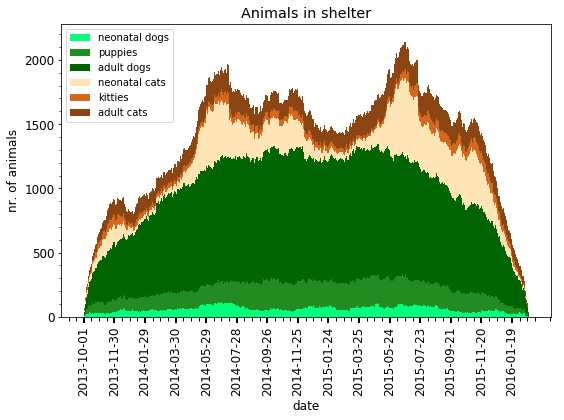

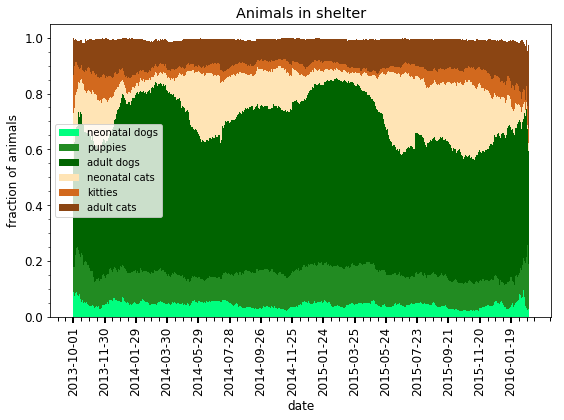

In [6]:
# make some plots
import pandas as pd
import numpy as np
import datetime
import collections
import os
from matplotlib import pylab as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

# plot the number of cats and dogs in the shelter as a function of date
# group the dogs and cats into age categories: neonatal cats and dogs (age < 6 weeks), 
# puppies and kitties (between 6 weeks and a year), adult cats and dogs (older than a year)

def parse_age(agestring):
    s = agestring.split(" ")
    agebit = int(s[0])
    if s[1].startswith("week"):
        return (agebit * 7e0)
    if s[1].startswith("month"):
        return (agebit * 30e0)
    if s[1].startswith("year"):
        return (agebit * 365e0)
    if s[1].startswith("day"):
        return (agebit*1e0)
    raise Exception(agestring)

# collect the files
files = []
dates = []
for file in os.listdir("shelter_dists/"):
    if file.endswith(".csv"):
        files.append(file)
        dates.append(file[13:23])
        
nr_neonatal_dogs = np.zeros(len(dates))
nr_neonatal_cats = np.zeros(len(dates))
nr_puppies = np.zeros(len(dates))
nr_kitties = np.zeros(len(dates))
nr_dogs = np.zeros(len(dates))
nr_cats = np.zeros(len(dates))
nr_animals = np.zeros(len(dates))

for i in range(len(files)):
    df = pd.read_csv("shelter_dists/"+files[i])
    age = df['Age upon Intake'].apply(lambda x:parse_age(x))
    nr_neonatal_dogs[i] = len(df[(df['AnimalType'] == 'Dog')&(age <= 42)])
    nr_neonatal_cats[i] = len(df[(df['AnimalType'] == 'Cat')&(age <= 42)])

    nr_puppies[i] = len(df[(df['AnimalType'] == 'Dog')&(age > 42)&(age < 365)])
    nr_kitties[i] = len(df[(df['AnimalType'] == 'Cat')&(age > 42)&(age < 365)])
    
    nr_dogs[i] = len(df[(df['AnimalType'] == 'Dog')&(age >= 365)])
    nr_cats[i] = len(df[(df['AnimalType'] == 'Cat')&(age >= 365)])
    
    nr_animals[i] = len(df)


plt.figure(figsize=(8,6))
width = 1e0
plt.title('Animals in shelter')
plt.xlabel('date')
plt.ylabel('nr. of animals')
plt1 = plt.bar(range(len(dates)), nr_neonatal_dogs, width,color='#00FF7F',edgecolor='none')
plt2 = plt.bar(range(len(dates)), nr_puppies, width,color='#228B22',bottom = nr_neonatal_dogs,edgecolor='none')
plt3 = plt.bar(range(len(dates)), nr_dogs, width,color='#006400',bottom = nr_neonatal_dogs+nr_puppies,edgecolor='none')
plt4 = plt.bar(range(len(dates)), nr_neonatal_cats, width,color='#FFE4B5',bottom = nr_neonatal_dogs+nr_puppies+nr_dogs,edgecolor='none')
plt5 = plt.bar(range(len(dates)), nr_kitties, width,color='#D2691E',bottom = nr_neonatal_dogs+nr_puppies+nr_dogs+nr_neonatal_cats,edgecolor='none')
plt6 = plt.bar(range(len(dates)), nr_cats, width,color='#8B4513',bottom = nr_neonatal_dogs+nr_puppies+nr_dogs+nr_neonatal_cats+nr_kitties,edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5,plt6],['neonatal dogs','puppies','adult dogs','neonatal cats','kitties','adult cats'],loc=2,fontsize=10)
plt.xticks(range(len(dates))[::60], dates[::60], rotation=90)
plt.tight_layout(w_pad=0, h_pad=0)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('figures/shelter_dist.pdf')
plt.savefig('figures/shelter_dist.jpg',dpi=150)
plt.show()
plt.close()


plt.figure(figsize=(8,6))
width = 1e0
plt.title('Animals in shelter')
plt.xlabel('date')
plt.ylabel('fraction of animals')
plt1 = plt.bar(range(len(dates)), nr_neonatal_dogs/nr_animals, width,color='#00FF7F',edgecolor='none')
plt2 = plt.bar(range(len(dates)), nr_puppies/nr_animals, width,color='#228B22',bottom = (nr_neonatal_dogs)/nr_animals,edgecolor='none')
plt3 = plt.bar(range(len(dates)), nr_dogs/nr_animals, width,color='#006400',bottom = (nr_neonatal_dogs+nr_puppies)/nr_animals,edgecolor='none')
plt4 = plt.bar(range(len(dates)), nr_neonatal_cats/nr_animals, width,color='#FFE4B5',bottom = (nr_neonatal_dogs+nr_puppies+nr_dogs)/nr_animals,edgecolor='none')
plt5 = plt.bar(range(len(dates)), nr_kitties/nr_animals, width,color='#D2691E',bottom = (nr_neonatal_dogs+nr_puppies+nr_dogs+nr_neonatal_cats)/nr_animals,edgecolor='none')
plt6 = plt.bar(range(len(dates)), nr_cats/nr_animals, width,color='#8B4513',bottom = (nr_neonatal_dogs+nr_puppies+nr_dogs+nr_neonatal_cats+nr_kitties)/nr_animals,edgecolor='none')
plt.legend([plt1,plt2,plt3,plt4,plt5,plt6],['neonatal dogs','puppies','adult dogs','neonatal cats','kitties','adult cats'],loc=6,fontsize=10)
plt.xticks(range(len(dates))[::60], dates[::60], rotation=90)
plt.tight_layout(w_pad=0, h_pad=0)
plt.tick_params(axis='x', length=6, which='major',width=2)
plt.tick_params(axis='x', length=4, which='minor',width=1)
plt.minorticks_on()
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('figures/shelter_dist_norm.pdf')
plt.savefig('figures/shelter_dist_norm.jpg',dpi=150)
plt.show()
plt.close()

## Data preprocessing

In [8]:
# prepare the train and test files

import pandas as pd
import numpy as np
import datetime
import collections
import os
import itertools

breeds = ['Blue Lacy','Queensland Heeler','Rhod Ridgeback','Retriever','Chinese Sharpei','Black Mouth Cur','Catahoula','Staffordshire','Affenpinscher','Afghan Hound','Airedale Terrier','Akita','Australian Kelpie','Alaskan Malamute','English Bulldog','American Bulldog','American English Coonhound','American Eskimo Dog (Miniature)','American Eskimo Dog (Standard)','American Eskimo Dog (Toy)','American Foxhound','American Hairless Terrier','American Staffordshire Terrier','American Water Spaniel','Anatolian Shepherd Dog','Australian Cattle Dog','Australian Shepherd','Australian Terrier','Basenji','Basset Hound','Beagle','Bearded Collie','Beauceron','Bedlington Terrier','Belgian Malinois','Belgian Sheepdog','Belgian Tervuren','Bergamasco','Berger Picard','Bernese Mountain Dog','Bichon Fris_','Black and Tan Coonhound','Black Russian Terrier','Bloodhound','Bluetick Coonhound','Boerboel','Border Collie','Border Terrier','Borzoi','Boston Terrier','Bouvier des Flandres','Boxer','Boykin Spaniel','Briard','Brittany','Brussels Griffon','Bull Terrier','Bull Terrier (Miniature)','Bulldog','Bullmastiff','Cairn Terrier','Canaan Dog','Cane Corso','Cardigan Welsh Corgi','Cavalier King Charles Spaniel','Cesky Terrier','Chesapeake Bay Retriever','Chihuahua','Chinese Crested Dog','Chinese Shar Pei','Chinook','Chow Chow',"Cirneco dell'Etna",'Clumber Spaniel','Cocker Spaniel','Collie','Coton de Tulear','Curly-Coated Retriever','Dachshund','Dalmatian','Dandie Dinmont Terrier','Doberman Pinsch','Doberman Pinscher','Dogue De Bordeaux','English Cocker Spaniel','English Foxhound','English Setter','English Springer Spaniel','English Toy Spaniel','Entlebucher Mountain Dog','Field Spaniel','Finnish Lapphund','Finnish Spitz','Flat-Coated Retriever','French Bulldog','German Pinscher','German Shepherd','German Shorthaired Pointer','German Wirehaired Pointer','Giant Schnauzer','Glen of Imaal Terrier','Golden Retriever','Gordon Setter','Great Dane','Great Pyrenees','Greater Swiss Mountain Dog','Greyhound','Harrier','Havanese','Ibizan Hound','Icelandic Sheepdog','Irish Red and White Setter','Irish Setter','Irish Terrier','Irish Water Spaniel','Irish Wolfhound','Italian Greyhound','Japanese Chin','Keeshond','Kerry Blue Terrier','Komondor','Kuvasz','Labrador Retriever','Lagotto Romagnolo','Lakeland Terrier','Leonberger','Lhasa Apso','L_wchen','Maltese','Manchester Terrier','Mastiff','Miniature American Shepherd','Miniature Bull Terrier','Miniature Pinscher','Miniature Schnauzer','Neapolitan Mastiff','Newfoundland','Norfolk Terrier','Norwegian Buhund','Norwegian Elkhound','Norwegian Lundehund','Norwich Terrier','Nova Scotia Duck Tolling Retriever','Old English Sheepdog','Otterhound','Papillon','Parson Russell Terrier','Pekingese','Pembroke Welsh Corgi','Petit Basset Griffon Vend_en','Pharaoh Hound','Plott','Pointer','Polish Lowland Sheepdog','Pomeranian','Standard Poodle','Miniature Poodle','Toy Poodle','Portuguese Podengo Pequeno','Portuguese Water Dog','Pug','Puli','Pyrenean Shepherd','Rat Terrier','Redbone Coonhound','Rhodesian Ridgeback','Rottweiler','Russell Terrier','St. Bernard','Saluki','Samoyed','Schipperke','Scottish Deerhound','Scottish Terrier','Sealyham Terrier','Shetland Sheepdog','Shiba Inu','Shih Tzu','Siberian Husky','Silky Terrier','Skye Terrier','Sloughi','Smooth Fox Terrier','Soft-Coated Wheaten Terrier','Spanish Water Dog','Spinone Italiano','Staffordshire Bull Terrier','Standard Schnauzer','Sussex Spaniel','Swedish Vallhund','Tibetan Mastiff','Tibetan Spaniel','Tibetan Terrier','Toy Fox Terrier','Treeing Walker Coonhound','Vizsla','Weimaraner','Welsh Springer Spaniel','Welsh Terrier','West Highland White Terrier','Whippet','Wire Fox Terrier','Wirehaired Pointing Griffon','Wirehaired Vizsla','Xoloitzcuintli','Yorkshire Terrier', 'Pit Bull', 'American Pit Bull Terrier', 'Angora', 'Siamese', 'Russian Blue', 'Dogo Argentino', 'English Pointer', 'Chesa Bay Retr', 'Manx', 'Maine Coon', 'Burmese', 'Bruss Griffon', 'Bengal', 'Bichon Frise', 'Old English Bulldog', 'Carolina Dog', 'German Pointer', 'Himalayan', 'Ragdoll', 'Boykin Span', 'Schnauzer Giant', 'Alaskan Husky', 'American Eskimo', 'Landseer', 'Bombay', 'Persian', 'Cavalier Span', 'Podengo Pequeno', 'Cornish Rex', 'Balinese', 'English Coonhound', 'Jindo', 'Javanese', 'Picardy Sheepdog', 'Patterdale Terr', 'Germaned Pointer', 'Treeing Tennesse Brindle', 'Japanese Bobtail', 'Pbgv', 'Glen Of Imaal', 'Pixiebob', 'Presa Canario', 'Chinese Crested', 'Bedlington Terr', 'Feist', 'Tonkinese', 'Entlebucher', 'Sphynx', 'Ocicat', 'Abyssinian', 'Munchkin', 'Turkish Van', 'Hovawart', 'Norwegian Forest Cat', 'Cymric', 'Port Water Dog', 'Treeing Cur', 'Spanish Mastiff', 'Lowchen', 'Havana Brown', 'Scottish Fold', 'Coton De Tulear', 'Dachshund Stan', 'Dandie Dinmont', 'Chartreux', 'Eng Toy Spaniel', 'Turkish Angora']
groups = ['Herding','Herding','Hound','Sporting','Non-Sporting','Herding','Herding','Terrier','Toy','Hound','Terrier','Working','Working','Working','Non-Sporting','Non-Sporting','Hound','Non-Sporting','Non-Sporting','Toy','Hound','Terrier','Terrier','Sporting','Working','Herding','Herding','Terrier','Hound','Hound','Hound','Herding','Herding','Terrier','Herding','Herding','Herding','Herding','Herding','Working','Non-Sporting','Hound','Working','Hound','Hound','Working','Herding','Terrier','Hound','Non-Sporting','Herding','Working','Sporting','Herding','Sporting','Toy','Terrier','Terrier','Non-Sporting','Working','Terrier','Working','Working','Herding','Toy','Terrier','Sporting','Toy','Toy','Non-Sporting','Working','Non-Sporting','Hound','Sporting','Sporting','Herding','Non-Sporting','Sporting','Hound','Non-Sporting','Terrier','Working','Working','Working','Sporting','Hound','Sporting','Sporting','Toy','Herding','Sporting','Herding','Non-Sporting','Sporting','Non-Sporting','Working','Herding','Sporting','Sporting','Working','Terrier','Sporting','Sporting','Working','Working','Working','Hound','Hound','Toy','Hound','Herding','Sporting','Sporting','Terrier','Sporting','Hound','Toy','Toy','Non-Sporting','Terrier','Working','Working','Sporting','Sporting','Terrier','Working','Non-Sporting','Non-Sporting','Toy','Terrier','Working','Herding','Terrier','Toy','Terrier','Working','Working','Terrier','Herding','Hound','Non-Sporting','Terrier','Sporting','Herding','Hound','Toy','Terrier','Toy','Herding','Hound','Hound','Hound','Sporting','Herding','Toy','Non-Sporting','Non-Sporting','Toy','Hound','Working','Toy','Herding','Herding','Terrier','Hound','Hound','Working','Terrier','Working','Hound','Working','Non-Sporting','Hound','Terrier','Terrier','Herding','Non-Sporting','Toy','Working','Toy','Terrier','Hound','Terrier','Terrier','Herding','Sporting','Terrier','Working','Sporting','Herding','Working','Non-Sporting','Non-Sporting','Toy','Hound','Sporting','Sporting','Sporting','Terrier','Terrier','Hound','Terrier','Sporting','Sporting','Non-Sporting','Toy', 'Pit Bull', 'Pit Bull', 'Exotic','Siamese', 'Exotic', 
'Hound', 'Sporting', 'Sporting', 'Exotic', 'Exotic', 'Siamese', 'Toy', 'Exotic', 'Toy', 'Hound', 'Non-Sporting', 'Herding', 'Exotic', 'Exotic', 'Sporting', 'Herding', 'Sporting', 'Non-Sporting', 'Non-Sporting', 'Exotic', 'Exotic', 'Sporting', 'Toy', 'Exotic', 'Exotic', 'Hound', 'Sporting', 'Exotic', 'Herding', 'Terrier', 'Sporting', 'Hound', 'Exotic', 'Hound', 'Terrier', 'Exotic', 'Herding', 'Toy', 'Terrier', 'Sporting', 'Exotic', 'Herding', 'Exotic', 'Exotic', 'Exotic', 'Exotic', 'Exotic', 'Working', 'Exotic', 'Exotic', 'Working', 'Working', 'Hound', 'Non-Sporting', 'Exotic', 'Exotic', 'Toy', 'Non-Sporting', 'Terrier', 'Exotic', 'Toy', 'Exotic']

bdict = dict(zip(breeds, groups))

colors = ['Apricot', 'Black', 'Black Brindle', 'Black Smoke', 'Black Tiger', 'Blue', 'Blue Cream', \
                         'Blue Merle', 'Blue Smoke', 'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle', \
                         'Brown Tabby', 'Brown Tiger', 'Buff', 'Chocolate', 'Cream', 'Fawn', 'Gold', 'Gray', 'Liver', \
                         'Liver Tick', 'Orange', 'Pink', 'Red', 'Red Merle', 'Red Tick', 'Ruddy', 'Sable', 'Silver', \
                         'Tan', 'Tricolor', 'White', 'Yellow', 'Yellow Brindle','Gray Tiger',\
                         'Agouti', 'Apricot', 'Black', 'Black Smoke', 'Black Tabby', 'Black Tiger', 'Blue', \
                         'Blue Cream', 'Blue Point', 'Blue Smoke', 'Blue Tabby', 'Brown', 'Brown Tabby', 'Brown Tiger', \
                         'Buff', 'Calico', 'Calico Point', 'Chocolate', 'Chocolate Point', 'Cream', 'Cream Tabby', \
                         'Flame Point', 'Gray', 'Gray Tabby', 'Lilac Point', 'Lynx Point', 'Orange', 'Orange Tabby', \
                         'Orange Tiger', 'Pink', 'Seal Point', 'Silver', 'Silver Lynx Point', 'Silver Tabby', 'Tan', \
                         'Torbie', 'Tortie', 'Tortie Point', 'Tricolor', 'White', 'Yellow', 'Red', \
                         'Black Brindle','Fawn']

color_groups = ['Light','Dark','Dark/Medium','Dark','Dark/Medium','Medium','Medium/Light', \
                 'Light/Medium', 'Medium', 'Medium', 'Medium', 'Medium','Medium', 'Light/Medium', 
                 'Medium', 'Medium','Light','Dark','Light','Light/Dark','Medium','Medium','Medium',
                 'Light/Medium','Medium','Medium','Medium','Light/Medium','Light/Medium','Medium','Medium/Dark','Medium',
                 'Medium','Light/Medium/Dark','Light','Light','Light/Medium','Medium/Dark',\
                 'Medium','Light','Dark','Dark', 'Dark', 'Dark/Medium', 'Medium',\
                 'Medium/Light','Light/Medium','Medium','Medium/Light','Medium','Medium/Light','Medium',\
                 'Light','Light/Medium/Dark','Light/Medium/Dark','Dark','Medium/Dark','Light','Light/Medium',\
                 'Light','Medium','Medium/Light', 'Light/Medium','Light/Medium','Medium','Medium',\
                  'Medium','Medium','Light/Dark','Medium','Light/Medium','Medium/Dark', 'Medium',\
                 'Medium/Dark','Dark/Medium','Light/Dark','Light/Medium/Dark','Light','Light', 'Medium',\
                 'Dark/Medium','Light']

cdict = dict(zip(colors, color_groups))

popdate = {}
DAY_ASSUMPTION = 7


def parse_age(agestring):
    s = agestring.split(" ")
    agebit = int(s[0])
    if s[1].startswith("week"):
        return (agebit * 7e0)
    if s[1].startswith("month"):
        return (agebit * 30e0)
    if s[1].startswith("year"):
        return (agebit * 365e0)
    if s[1].startswith("day"):
        return (agebit*1e0)
    raise Exception(agestring)

def parse_breed_mix(breedstring):
    if breedstring.endswith("Mix") or "Domestic" in breedstring:
        return 1
    return 0

def parse_breed_cross(breedstring):
    if "/" in breedstring:
        return 1
    return 0

def parse_breed_miniature(breedstring):
    if "Miniature" in breedstring:
        return 1
    return 0

def parse_breed_hairtype(breedstring):
    if "Shorthair" in breedstring:
        return 1
    if "Medium Hair" in breedstring:
        return 2
    if "Longhair" in breedstring:
        return 3
    if "hairless" in breedstring.lower():
        return 4
    if "Wirehair" in breedstring:
        return 5
    return 0

def parse_breed_anyof(breedstring, anyof):
    for w in anyof:
        if w.lower() in breedstring.lower():
            return 1
    return 0

def parse_breed_simplified(breedstring):
    if breedstring.endswith("Mix"):
        breedstring = breedstring[:-4]
    if breedstring.startswith("Domestic"):
        if "/" in breedstring:
            return breedstring.split("/")[0]
        return breedstring

    if breedstring == "American Shorthair":
        return "Domestic"

    if breedstring == "American Wirehair":
        return "Domestic"

    if breedstring == "British Shorthair":
        return "Domestic"

    if breedstring == 'Oriental Sh':
        return "Domestic"

    if "Unknown" in breedstring:
        return "Domestic"

    if "West Highland" in breedstring:
        return "Terrier"

    if "Hound" in breedstring:
        return "Hound"

    if "Terrier" in breedstring:
        return "Terrier"

    if breedstring.endswith("Terr"):
        return "Terrier"

    if "Shepherd" in breedstring:
        return "Herding"

    if "Exotic" in breedstring:
        return "Exotic"

    if "Devon Rex" in breedstring:
        return "Exotic"

    if "Snowshoe" in breedstring:
        return "Exotic"

    if "Mexican Hairless" in breedstring:
        return "Exotic"

    breedstring = breedstring.replace(' Shorthair','')
    breedstring = breedstring.replace(' Longhair','')
    breedstring = breedstring.replace(' Wirehair','')
    breedstring = breedstring.replace(' Rough','')
    breedstring = breedstring.replace(' Smooth Coat','')
    breedstring = breedstring.replace(' Smooth','')
    breedstring = breedstring.replace(' Black/Tan','')
    breedstring = breedstring.replace('Black/Tan ','')
    breedstring = breedstring.replace(' Flat Coat','')
    breedstring = breedstring.replace('Flat Coat ','')
    breedstring = breedstring.replace(' Coat','')

    if "/" in breedstring:
        breedstring = breedstring.split("/")[0]

    return bdict[breedstring]


def parse_color(colorstring):
    split = colorstring.split('/')
    string = ""
    #print split
    for j in split:
        #print '   ',j
        string += cdict[j]+'/'
    collect = []
    for j in string[:-1].split('/'):
        if j not in collect:
            collect.append(j)
    if len(collect) == 3:
        color_groups = 'Tricolor'
    else:
        color_groups = "/".join(collect)
    return color_groups

def count_words(name):
    if type(name) is not str:
        return 0
    if len(name) <= 0:
        return 0
    return len(name.split(" "))

def parse_outcome(outcome):
    if outcome == "Adoption":
        return 0
    if outcome == "Died":
        return 1
    if outcome == "Euthanasia":
        return 2
    if outcome == "Return_to_owner":
        return 3
    if outcome == "Transfer":
        return 4

    raise Exception("Unknown outcome type")

def parse_intact(intact):
    if "Intact" in intact:
        return 2
    if "Unknown" in intact:
        return 0
    return 1

def parse_sex(sex):
    if "Male" in sex:
        return 1
    if "Female" in sex:
        return 2
    return 0

def calc_len(name):
    if type(name) is not str:
        return 0
    return len(name)

def occur(x,name_dict):
    return name_dict[x]

def parse_shelter_dist(x,breed_groups):
    animaltype = ['Cat','Dog']
    gender = ['Neutered Male','Intact Male','Spayed Female','Intact Female']
    age_ranges = [[0,42],[42,365],[365,3650],[3650,36500]]
    
    # all combinations of these lists:
    #combos = list(itertools.product(animaltype,gender,age_ranges))
    combos = list(itertools.product(animaltype,age_ranges))
    #combos = list(itertools.product(animaltype,breed_groups))
    #combos = []
    #combos = list(itertools.product(animaltype,breed_groups,age_ranges))
    
    if os.path.isfile('shelter_dists/shelter_dist_'+str(x['dtm'].date())+'.csv'):
    
        df_shelter = pd.read_csv('shelter_dists/shelter_dist_'+str(x['dtm'].date())+'.csv')
        age = df_shelter['Age upon Intake'].apply(lambda y:parse_age(y))
        
        features_cat = []
        features_dog = []
        
        for i in combos:            
            
            if i[0] == 'cat':
                #nr = 1e0*len(df_shelter[(df_shelter['AnimalType'] == i[0])&(df_shelter['Sex upon Intake'] == i[1])&(age >= i[2][0])&(age < i[2][1])])
                nr = 1e0*len(df_shelter[(df_shelter['AnimalType'] == i[0])&(age >= i[1][0])&(age < i[1][1])])
                #nr = 1e0*len(df_shelter[(df_shelter['AnimalType'] == i[0])&(df_shelter['Breed group'] == i[1])])
                #nr = 1e0*len(df_shelter[(df_shelter['AnimalType'] == i[0])&(df_shelter['Breed group'] == i[1])&(age >= i[2][0])&(age < i[2][1])])
                
                features_cat.append(nr)
            else:
                #nr = 1e0*len(df_shelter[(df_shelter['AnimalType'] == i[0])&(df_shelter['Sex upon Intake'] == i[1])&(age >= i[2][0])&(age < i[2][1])])
                nr = 1e0*len(df_shelter[(df_shelter['AnimalType'] == i[0])&(age >= i[1][0])&(age < i[1][1])])
                #nr = 1e0*len(df_shelter[(df_shelter['AnimalType'] == i[0])&(df_shelter['Breed group'] == i[1])])
                #nr = 1e0*len(df_shelter[(df_shelter['AnimalType'] == i[0])&(df_shelter['Breed group'] == i[1])&(age >= i[2][0])&(age < i[2][1])])

                features_dog.append(nr)
        
        nr_dogs_total = 1e0*len(df_shelter[df_shelter['AnimalType'] == 'Dog'])
        nr_cats_total = 1e0*len(df_shelter[df_shelter['AnimalType'] == 'Cat'])
        
        nr_animals_total = 1e0*len(df_shelter)
        
        if x['AnimalType_x'] == 'Dog':
            #return pd.Series(data=[x/nr_dogs_total for x in features_dog]+[x/nr_cats_total for x in features_cat]+[nr_dogs_total,nr_cats_total,nr_animals_total])
            return pd.Series(data=features_dog+features_cat+[nr_dogs_total,nr_cats_total,nr_animals_total])
            #return pd.Series(data=[nr_dogs_total,nr_cats_total,nr_animals_total])
        else:
            #return pd.Series(data=[x/nr_cats_total for x in features_cat]+[x/nr_dogs_total for x in features_dog]+[nr_cats_total,nr_dogs_total,nr_animals_total])
            return pd.Series(data=features_cat+features_dog+[nr_cats_total,nr_dogs_total,nr_animals_total])
            #return pd.Series(data=[nr_cats_total,nr_dogs_total,nr_animals_total])
    else:
        return pd.Series(data=np.zeros(len(combos)+3)-1)


def apply_df(df):
    df['HasName'] = df['Name_x'].apply(lambda x:count_words(x))
    
    unique_names, name_counts = np.unique(df['Name_x'],return_counts=True)
    name_counts[0] = 0
    
    name_dict = dict(zip(unique_names, 1e0*name_counts/np.sum(name_counts)))
    df['NameOccurrance'] = df['Name_x'].apply(lambda x:occur(x, name_dict))    

    df['NameLen'] = df['Name_x'].apply(lambda x:calc_len(x))
    df['Name_x'].fillna('Unnamed', inplace=True)
    
    # intake time
    df['dtm'] = pd.to_datetime(df['DateTime_y'])
    df['year'] = df['dtm'].dt.year
    df['month'] = df['dtm'].dt.month
    df['hour'] = df['dtm'].dt.hour + df['dtm'].dt.minute / 60e0
    df['wday'] = df['dtm'].dt.dayofweek
    df['qtr'] = df['dtm'].dt.quarter
    df['day'] = df['dtm'].dt.day

    df['Sex upon Intake'].fillna('Unknown', inplace=True)

    df['Age upon Intake'].fillna('-1 days', inplace=True)
    df['AgeDays'] = df['Age upon Intake'].apply(lambda x:parse_age(x))

    df['IsMix'] = df['Breed_x'].apply(lambda x:parse_breed_mix(x))
    df['Cross'] = df['Breed_x'].apply(lambda x:parse_breed_cross(x))
    df['Miniature'] = df['Breed_x'].apply(lambda x:parse_breed_miniature(x))
    df['Hairtype'] = df['Breed_x'].apply(lambda x:parse_breed_hairtype(x))
    df['IsShihTzu'] = df['Breed_x'].apply(lambda x:parse_breed_anyof(x, ["Shih Tzu"]))
    df['IsAggressive'] = df['Breed_x'].apply(lambda x:parse_breed_anyof(x, ["Rottweiler", "Pit Bull", "Siberian Husky"]))
    df['Breed'] = df['Breed_x'].apply(lambda x:parse_breed_simplified(x))

    df['Intact'] = df['Sex upon Intake'].apply(lambda x:parse_intact(x))
    df['Sex'] = df['Sex upon Intake'].apply(lambda x:parse_sex(x))

    df['ColorGroups'] = df['Color_x'].apply(lambda x:parse_color(x))    
    
                                        
    breed_groups = np.unique(df['Breed'])
    # characterize the properties of the animal population in the shelter
    new_cols = df.apply(lambda row: parse_shelter_dist(row,breed_groups),axis=1)
    col_names = list(new_cols.columns.values)
    new_cols.rename(columns=dict(zip(col_names, ['shelter_dist_'+str(x) for x in col_names])), inplace=True)
    print list(new_cols.columns.values)
    df = df.join(new_cols)

    df.drop('Sex upon Intake', axis=1, inplace=True)
    df.drop('AnimalType_y', axis=1, inplace=True)
    df.drop('Color_x', axis=1, inplace=True)
    df.drop('Color_y', axis=1, inplace=True)
    df.drop('Breed_x', axis=1, inplace=True)
    df.drop('Breed_y', axis=1, inplace=True)
    df.drop('Name_x',axis=1, inplace=True)
    df.drop('Name_y',axis=1, inplace=True)
    df.drop('DateTime_x',axis=1, inplace=True)
    df.drop('DateTime_y',axis=1, inplace=True)
    df.drop('SexuponOutcome',axis=1, inplace=True)
    df.drop('AgeuponOutcome',axis=1, inplace=True)
    df.drop('dtm',axis=1, inplace=True)
    df.drop('Age upon Intake', axis=1, inplace=True)
    df.drop('MonthYear', axis=1, inplace=True)
    
    print 'inside function'
    print list(df.columns.values)
    
    return df



def apply_onehot(df_train,df_test,col):
    train = df_train[col]
    test = df_test[col]
    encoded = pd.get_dummies(pd.concat([train,test], axis=0))
    train_rows = train.shape[0]
    train_encoded = encoded.iloc[:train_rows, :]
    test_encoded = encoded.iloc[train_rows:, :] 

    df_train = df_train.join(train_encoded)
    df_test = df_test.join(test_encoded)

    df_train.drop(col, axis=1, inplace=True)
    df_test.drop(col, axis=1, inplace=True)

    return df_train,df_test


def convert_set(trainfile,testfile,isTrain=False):
    df_train = pd.read_csv(trainfile)
    df_test = pd.read_csv(testfile)

    #df_intake = pd.read_csv('Austin_Animal_Center_Intakes.csv')
    #df_intake = df_intake[['AnimalID','Intake Type','Intake Condition']]

    # AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
    # A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
    # A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
    # A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
    
    df_train = df_train.drop('OutcomeSubtype', axis=1)

    df_train['OutcomeType'] = df_train['OutcomeType'].apply(lambda x:parse_outcome(x))

    print 'before'
    print list(df_train.columns.values)
    print list(df_test.columns.values)
    
    df_train = apply_df(df_train)
    df_test = apply_df(df_test)

    print 'after'
    print list(df_train.columns.values)
    print list(df_test.columns.values)
    
    df_train, df_test = apply_onehot(df_train,df_test,'AnimalType_x')
    df_train, df_test = apply_onehot(df_train,df_test,'ColorGroups')
    df_train, df_test = apply_onehot(df_train,df_test,'Breed')
    df_train, df_test = apply_onehot(df_train,df_test,'Intake Type')
    df_train, df_test = apply_onehot(df_train,df_test,'Intake Condition')

    print 'final'
    print list(df_train.columns.values)
    print list(df_test.columns.values)

    
    return df_train, df_test  

df_train, df_test = convert_set("data/train_merged.csv", "data/test_merged.csv")

df_train.to_csv("data/train_intake.csv", index=False)
df_test.to_csv("data/test_intake.csv", index=False)

print 'done'

before
['AnimalID', 'Name_x', 'DateTime_x', 'OutcomeType', 'AnimalType_x', 'SexuponOutcome', 'AgeuponOutcome', 'Breed_x', 'Color_x', 'Name_y', 'DateTime_y', 'MonthYear', 'Intake Type', 'Intake Condition', 'AnimalType_y', 'Sex upon Intake', 'Age upon Intake', 'Breed_y', 'Color_y', 'MultipleIntakes']
['ID', 'Name_x', 'DateTime_x', 'AnimalType_x', 'SexuponOutcome', 'AgeuponOutcome', 'Breed_x', 'Color_x', 'AnimalID', 'Name_y', 'DateTime_y', 'MonthYear', 'Intake Type', 'Intake Condition', 'AnimalType_y', 'Sex upon Intake', 'Age upon Intake', 'Breed_y', 'Color_y', 'MultipleIntakes']
['shelter_dist_0', 'shelter_dist_1', 'shelter_dist_2', 'shelter_dist_3', 'shelter_dist_4', 'shelter_dist_5', 'shelter_dist_6', 'shelter_dist_7', 'shelter_dist_8', 'shelter_dist_9', 'shelter_dist_10']
inside function
['AnimalID', 'OutcomeType', 'AnimalType_x', 'Intake Type', 'Intake Condition', 'MultipleIntakes', 'HasName', 'NameOccurrance', 'NameLen', 'year', 'month', 'hour', 'wday', 'qtr', 'day', 'AgeDays', 'IsM

## XGBoost

/Users/Walter/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Multiple Intakes: 1
   Number of animals: 24918
    0    0.400955
4    0.361345
3    0.171763
2    0.058191
1    0.007745
Name: OutcomeType, dtype: float64
Multiple Intakes: >1
   Number of animals: 1812
    0    0.429360
3    0.279249
4    0.230684
2    0.058499
1    0.002208
Name: OutcomeType, dtype: float64
[0]	train-mlogloss:1.60424	val-mlogloss:1.60457
Multiple eval metrics have been passed: 'val-mlogloss' will be used for early stopping.

Will train until val-mlogloss hasn't improved in 60 rounds.
[1]	train-mlogloss:1.59909	val-mlogloss:1.59972
[2]	train-mlogloss:1.59395	val-mlogloss:1.59491
[3]	train-mlogloss:1.58886	val-mlogloss:1.59012
[4]	train-mlogloss:1.58383	val-mlogloss:1.58539
[5]	train-mlogloss:1.57883	val-mlogloss:1.58071
[6]	train-mlogloss:1.57391	val-mlogloss:1.57605
[7]	train-mlogloss:1.56903	val-mlogloss:1.57146
[8]	train-mlogloss:1.56414	val-mlogloss:1.5669
[9]	train-mlogloss:1.55934	val-mlogloss:1.56243
[10]	train-mlogloss:1.55458	val-mlogloss:1.55793
[11]	train-

[158]	train-mlogloss:1.12185	val-mlogloss:1.16048
[159]	train-mlogloss:1.12001	val-mlogloss:1.15887
[160]	train-mlogloss:1.11819	val-mlogloss:1.15726
[161]	train-mlogloss:1.11639	val-mlogloss:1.15566
[162]	train-mlogloss:1.11461	val-mlogloss:1.15412
[163]	train-mlogloss:1.11282	val-mlogloss:1.15257
[164]	train-mlogloss:1.11105	val-mlogloss:1.15103
[165]	train-mlogloss:1.10928	val-mlogloss:1.14946
[166]	train-mlogloss:1.10755	val-mlogloss:1.14791
[167]	train-mlogloss:1.10581	val-mlogloss:1.14637
[168]	train-mlogloss:1.10411	val-mlogloss:1.14486
[169]	train-mlogloss:1.1024	val-mlogloss:1.14337
[170]	train-mlogloss:1.10071	val-mlogloss:1.14186
[171]	train-mlogloss:1.09901	val-mlogloss:1.14038
[172]	train-mlogloss:1.09732	val-mlogloss:1.1389
[173]	train-mlogloss:1.09563	val-mlogloss:1.13743
[174]	train-mlogloss:1.09397	val-mlogloss:1.13598
[175]	train-mlogloss:1.09228	val-mlogloss:1.1345
[176]	train-mlogloss:1.09063	val-mlogloss:1.13304
[177]	train-mlogloss:1.08902	val-mlogloss:1.1316
[178

[321]	train-mlogloss:0.91465	val-mlogloss:0.986894
[322]	train-mlogloss:0.913766	val-mlogloss:0.986206
[323]	train-mlogloss:0.912875	val-mlogloss:0.985511
[324]	train-mlogloss:0.912002	val-mlogloss:0.984838
[325]	train-mlogloss:0.911131	val-mlogloss:0.984166
[326]	train-mlogloss:0.910256	val-mlogloss:0.983501
[327]	train-mlogloss:0.909388	val-mlogloss:0.982814
[328]	train-mlogloss:0.908523	val-mlogloss:0.98215
[329]	train-mlogloss:0.907671	val-mlogloss:0.981489
[330]	train-mlogloss:0.906804	val-mlogloss:0.980844
[331]	train-mlogloss:0.905947	val-mlogloss:0.980178
[332]	train-mlogloss:0.905109	val-mlogloss:0.979537
[333]	train-mlogloss:0.904253	val-mlogloss:0.978895
[334]	train-mlogloss:0.903396	val-mlogloss:0.978245
[335]	train-mlogloss:0.902554	val-mlogloss:0.977595
[336]	train-mlogloss:0.901725	val-mlogloss:0.976955
[337]	train-mlogloss:0.900909	val-mlogloss:0.976342
[338]	train-mlogloss:0.900058	val-mlogloss:0.975706
[339]	train-mlogloss:0.899246	val-mlogloss:0.975084
[340]	train-ml

[480]	train-mlogloss:0.805866	val-mlogloss:0.909124
[481]	train-mlogloss:0.805348	val-mlogloss:0.908777
[482]	train-mlogloss:0.80483	val-mlogloss:0.908451
[483]	train-mlogloss:0.80429	val-mlogloss:0.908113
[484]	train-mlogloss:0.803768	val-mlogloss:0.907778
[485]	train-mlogloss:0.803278	val-mlogloss:0.90744
[486]	train-mlogloss:0.802738	val-mlogloss:0.907082
[487]	train-mlogloss:0.80221	val-mlogloss:0.906749
[488]	train-mlogloss:0.801661	val-mlogloss:0.906423
[489]	train-mlogloss:0.801124	val-mlogloss:0.906111
[490]	train-mlogloss:0.800651	val-mlogloss:0.905792
[491]	train-mlogloss:0.800143	val-mlogloss:0.905481
[492]	train-mlogloss:0.799662	val-mlogloss:0.905164
[493]	train-mlogloss:0.799138	val-mlogloss:0.904836
[494]	train-mlogloss:0.798633	val-mlogloss:0.904532
[495]	train-mlogloss:0.798127	val-mlogloss:0.9042
[496]	train-mlogloss:0.797658	val-mlogloss:0.903888
[497]	train-mlogloss:0.797161	val-mlogloss:0.903596
[498]	train-mlogloss:0.796645	val-mlogloss:0.90329
[499]	train-mloglos

[639]	train-mlogloss:0.737557	val-mlogloss:0.869308
[640]	train-mlogloss:0.737191	val-mlogloss:0.86913
[641]	train-mlogloss:0.736819	val-mlogloss:0.868944
[642]	train-mlogloss:0.736458	val-mlogloss:0.868772
[643]	train-mlogloss:0.736072	val-mlogloss:0.868611
[644]	train-mlogloss:0.735724	val-mlogloss:0.86845
[645]	train-mlogloss:0.735379	val-mlogloss:0.86828
[646]	train-mlogloss:0.735019	val-mlogloss:0.868111
[647]	train-mlogloss:0.734667	val-mlogloss:0.867922
[648]	train-mlogloss:0.734314	val-mlogloss:0.867732
[649]	train-mlogloss:0.734016	val-mlogloss:0.867577
[650]	train-mlogloss:0.733683	val-mlogloss:0.86739
[651]	train-mlogloss:0.733349	val-mlogloss:0.867231
[652]	train-mlogloss:0.73297	val-mlogloss:0.86706
[653]	train-mlogloss:0.732605	val-mlogloss:0.866911
[654]	train-mlogloss:0.73224	val-mlogloss:0.866744
[655]	train-mlogloss:0.731884	val-mlogloss:0.866566
[656]	train-mlogloss:0.731528	val-mlogloss:0.866372
[657]	train-mlogloss:0.731169	val-mlogloss:0.866206
[658]	train-mloglos

[798]	train-mlogloss:0.689205	val-mlogloss:0.847536
[799]	train-mlogloss:0.688957	val-mlogloss:0.847432
[800]	train-mlogloss:0.688669	val-mlogloss:0.847321
[801]	train-mlogloss:0.688388	val-mlogloss:0.8472
[802]	train-mlogloss:0.688119	val-mlogloss:0.847097
[803]	train-mlogloss:0.687875	val-mlogloss:0.846987
[804]	train-mlogloss:0.687608	val-mlogloss:0.846891
[805]	train-mlogloss:0.687338	val-mlogloss:0.846804
[806]	train-mlogloss:0.687037	val-mlogloss:0.846697
[807]	train-mlogloss:0.686774	val-mlogloss:0.846599
[808]	train-mlogloss:0.686521	val-mlogloss:0.846498
[809]	train-mlogloss:0.686252	val-mlogloss:0.846394
[810]	train-mlogloss:0.686017	val-mlogloss:0.846324
[811]	train-mlogloss:0.685735	val-mlogloss:0.846195
[812]	train-mlogloss:0.685499	val-mlogloss:0.846108
[813]	train-mlogloss:0.685255	val-mlogloss:0.846024
[814]	train-mlogloss:0.684959	val-mlogloss:0.845928
[815]	train-mlogloss:0.684656	val-mlogloss:0.845822
[816]	train-mlogloss:0.684365	val-mlogloss:0.845707
[817]	train-ml

[957]	train-mlogloss:0.651757	val-mlogloss:0.834496
[958]	train-mlogloss:0.65157	val-mlogloss:0.834436
[959]	train-mlogloss:0.651353	val-mlogloss:0.834378
[960]	train-mlogloss:0.651128	val-mlogloss:0.834323
[961]	train-mlogloss:0.650925	val-mlogloss:0.834262
[962]	train-mlogloss:0.650713	val-mlogloss:0.834195
[963]	train-mlogloss:0.650516	val-mlogloss:0.834145
[964]	train-mlogloss:0.650267	val-mlogloss:0.834096
[965]	train-mlogloss:0.650077	val-mlogloss:0.834035
[966]	train-mlogloss:0.649826	val-mlogloss:0.833962
[967]	train-mlogloss:0.649653	val-mlogloss:0.833908
[968]	train-mlogloss:0.649435	val-mlogloss:0.833836
[969]	train-mlogloss:0.6492	val-mlogloss:0.833774
[970]	train-mlogloss:0.648969	val-mlogloss:0.833718
[971]	train-mlogloss:0.648773	val-mlogloss:0.833656
[972]	train-mlogloss:0.648541	val-mlogloss:0.833583
[973]	train-mlogloss:0.64834	val-mlogloss:0.833512
[974]	train-mlogloss:0.648129	val-mlogloss:0.833432
[975]	train-mlogloss:0.647947	val-mlogloss:0.833368
[976]	train-mlog

[1114]	train-mlogloss:0.62085	val-mlogloss:0.826518
[1115]	train-mlogloss:0.62063	val-mlogloss:0.826468
[1116]	train-mlogloss:0.620483	val-mlogloss:0.826432
[1117]	train-mlogloss:0.620283	val-mlogloss:0.826386
[1118]	train-mlogloss:0.62011	val-mlogloss:0.826349
[1119]	train-mlogloss:0.619893	val-mlogloss:0.82631
[1120]	train-mlogloss:0.619766	val-mlogloss:0.826284
[1121]	train-mlogloss:0.619599	val-mlogloss:0.826259
[1122]	train-mlogloss:0.619383	val-mlogloss:0.826233
[1123]	train-mlogloss:0.619256	val-mlogloss:0.826194
[1124]	train-mlogloss:0.61909	val-mlogloss:0.826167
[1125]	train-mlogloss:0.618893	val-mlogloss:0.826128
[1126]	train-mlogloss:0.618747	val-mlogloss:0.826088
[1127]	train-mlogloss:0.618556	val-mlogloss:0.826042
[1128]	train-mlogloss:0.618382	val-mlogloss:0.826018
[1129]	train-mlogloss:0.61823	val-mlogloss:0.825982
[1130]	train-mlogloss:0.618053	val-mlogloss:0.825948
[1131]	train-mlogloss:0.617901	val-mlogloss:0.825892
[1132]	train-mlogloss:0.61767	val-mlogloss:0.825867


[1270]	train-mlogloss:0.594617	val-mlogloss:0.821575
[1271]	train-mlogloss:0.594416	val-mlogloss:0.821549
[1272]	train-mlogloss:0.594268	val-mlogloss:0.821519
[1273]	train-mlogloss:0.594107	val-mlogloss:0.821481
[1274]	train-mlogloss:0.593944	val-mlogloss:0.821462
[1275]	train-mlogloss:0.593775	val-mlogloss:0.821429
[1276]	train-mlogloss:0.593599	val-mlogloss:0.821415
[1277]	train-mlogloss:0.593434	val-mlogloss:0.821363
[1278]	train-mlogloss:0.593282	val-mlogloss:0.821363
[1279]	train-mlogloss:0.593132	val-mlogloss:0.821345
[1280]	train-mlogloss:0.592955	val-mlogloss:0.821308
[1281]	train-mlogloss:0.592772	val-mlogloss:0.821281
[1282]	train-mlogloss:0.592618	val-mlogloss:0.821276
[1283]	train-mlogloss:0.59246	val-mlogloss:0.821275
[1284]	train-mlogloss:0.592297	val-mlogloss:0.821249
[1285]	train-mlogloss:0.592165	val-mlogloss:0.82123
[1286]	train-mlogloss:0.592	val-mlogloss:0.82121
[1287]	train-mlogloss:0.591872	val-mlogloss:0.821182
[1288]	train-mlogloss:0.591697	val-mlogloss:0.821133

[1426]	train-mlogloss:0.570286	val-mlogloss:0.81822
[1427]	train-mlogloss:0.570142	val-mlogloss:0.818195
[1428]	train-mlogloss:0.570001	val-mlogloss:0.818159
[1429]	train-mlogloss:0.569867	val-mlogloss:0.818148
[1430]	train-mlogloss:0.569707	val-mlogloss:0.818118
[1431]	train-mlogloss:0.569509	val-mlogloss:0.818088
[1432]	train-mlogloss:0.569355	val-mlogloss:0.818065
[1433]	train-mlogloss:0.569203	val-mlogloss:0.818044
[1434]	train-mlogloss:0.56906	val-mlogloss:0.818039
[1435]	train-mlogloss:0.568908	val-mlogloss:0.818009
[1436]	train-mlogloss:0.568773	val-mlogloss:0.818006
[1437]	train-mlogloss:0.568653	val-mlogloss:0.817988
[1438]	train-mlogloss:0.568511	val-mlogloss:0.817961
[1439]	train-mlogloss:0.568387	val-mlogloss:0.817923
[1440]	train-mlogloss:0.568271	val-mlogloss:0.817916
[1441]	train-mlogloss:0.568122	val-mlogloss:0.817897
[1442]	train-mlogloss:0.567975	val-mlogloss:0.817865
[1443]	train-mlogloss:0.567864	val-mlogloss:0.817856
[1444]	train-mlogloss:0.567724	val-mlogloss:0.81

[1582]	train-mlogloss:0.548606	val-mlogloss:0.81613
[1583]	train-mlogloss:0.548474	val-mlogloss:0.816121
[1584]	train-mlogloss:0.548313	val-mlogloss:0.816115
[1585]	train-mlogloss:0.548194	val-mlogloss:0.816109
[1586]	train-mlogloss:0.548074	val-mlogloss:0.816095
[1587]	train-mlogloss:0.547922	val-mlogloss:0.816077
[1588]	train-mlogloss:0.54775	val-mlogloss:0.816073
[1589]	train-mlogloss:0.547615	val-mlogloss:0.816054
[1590]	train-mlogloss:0.547489	val-mlogloss:0.816035
[1591]	train-mlogloss:0.547324	val-mlogloss:0.816025
[1592]	train-mlogloss:0.547188	val-mlogloss:0.816014
[1593]	train-mlogloss:0.547024	val-mlogloss:0.816007
[1594]	train-mlogloss:0.546924	val-mlogloss:0.816003
[1595]	train-mlogloss:0.546799	val-mlogloss:0.815986
[1596]	train-mlogloss:0.546659	val-mlogloss:0.815989
[1597]	train-mlogloss:0.546515	val-mlogloss:0.815962
[1598]	train-mlogloss:0.546386	val-mlogloss:0.815955
[1599]	train-mlogloss:0.546247	val-mlogloss:0.815949
[1600]	train-mlogloss:0.546097	val-mlogloss:0.81

[1738]	train-mlogloss:0.5283	val-mlogloss:0.814866
[1739]	train-mlogloss:0.52819	val-mlogloss:0.814862
[1740]	train-mlogloss:0.528062	val-mlogloss:0.81484
[1741]	train-mlogloss:0.527901	val-mlogloss:0.814828
[1742]	train-mlogloss:0.527766	val-mlogloss:0.814805
[1743]	train-mlogloss:0.527628	val-mlogloss:0.814784
[1744]	train-mlogloss:0.527506	val-mlogloss:0.814786
[1745]	train-mlogloss:0.527408	val-mlogloss:0.814774
[1746]	train-mlogloss:0.527263	val-mlogloss:0.814768
[1747]	train-mlogloss:0.527145	val-mlogloss:0.814761
[1748]	train-mlogloss:0.527012	val-mlogloss:0.814754
[1749]	train-mlogloss:0.52689	val-mlogloss:0.814749
[1750]	train-mlogloss:0.52673	val-mlogloss:0.814754
[1751]	train-mlogloss:0.526635	val-mlogloss:0.814755
[1752]	train-mlogloss:0.526509	val-mlogloss:0.814736
[1753]	train-mlogloss:0.526411	val-mlogloss:0.814737
[1754]	train-mlogloss:0.526289	val-mlogloss:0.814727
[1755]	train-mlogloss:0.526164	val-mlogloss:0.814721
[1756]	train-mlogloss:0.526004	val-mlogloss:0.814714

[1894]	train-mlogloss:0.509432	val-mlogloss:0.813829
[1895]	train-mlogloss:0.509339	val-mlogloss:0.813825
[1896]	train-mlogloss:0.509228	val-mlogloss:0.813809
[1897]	train-mlogloss:0.509085	val-mlogloss:0.8138
[1898]	train-mlogloss:0.50896	val-mlogloss:0.813794
[1899]	train-mlogloss:0.508848	val-mlogloss:0.813777
[1900]	train-mlogloss:0.508739	val-mlogloss:0.81378
[1901]	train-mlogloss:0.5086	val-mlogloss:0.813767
[1902]	train-mlogloss:0.508478	val-mlogloss:0.813752
[1903]	train-mlogloss:0.508365	val-mlogloss:0.813753
[1904]	train-mlogloss:0.508242	val-mlogloss:0.813746
[1905]	train-mlogloss:0.508152	val-mlogloss:0.813741
[1906]	train-mlogloss:0.507983	val-mlogloss:0.813745
[1907]	train-mlogloss:0.507843	val-mlogloss:0.813728
[1908]	train-mlogloss:0.507715	val-mlogloss:0.813722
[1909]	train-mlogloss:0.507596	val-mlogloss:0.813712
[1910]	train-mlogloss:0.507481	val-mlogloss:0.813701
[1911]	train-mlogloss:0.507359	val-mlogloss:0.813692
[1912]	train-mlogloss:0.507229	val-mlogloss:0.813702

[2050]	train-mlogloss:0.491347	val-mlogloss:0.813144
[2051]	train-mlogloss:0.491209	val-mlogloss:0.813137
[2052]	train-mlogloss:0.491073	val-mlogloss:0.813147
[2053]	train-mlogloss:0.490963	val-mlogloss:0.813156
[2054]	train-mlogloss:0.49086	val-mlogloss:0.813152
[2055]	train-mlogloss:0.490758	val-mlogloss:0.81314
[2056]	train-mlogloss:0.490608	val-mlogloss:0.813138
[2057]	train-mlogloss:0.490516	val-mlogloss:0.813134
[2058]	train-mlogloss:0.490406	val-mlogloss:0.813138
[2059]	train-mlogloss:0.490329	val-mlogloss:0.813126
[2060]	train-mlogloss:0.490211	val-mlogloss:0.813128
[2061]	train-mlogloss:0.490123	val-mlogloss:0.813143
[2062]	train-mlogloss:0.490019	val-mlogloss:0.81314
[2063]	train-mlogloss:0.48992	val-mlogloss:0.813136
[2064]	train-mlogloss:0.489783	val-mlogloss:0.813138
[2065]	train-mlogloss:0.489633	val-mlogloss:0.81313
[2066]	train-mlogloss:0.489546	val-mlogloss:0.813141
[2067]	train-mlogloss:0.489418	val-mlogloss:0.813136
[2068]	train-mlogloss:0.489319	val-mlogloss:0.81310

[2206]	train-mlogloss:0.473891	val-mlogloss:0.812879
[2207]	train-mlogloss:0.473785	val-mlogloss:0.812866
[2208]	train-mlogloss:0.473668	val-mlogloss:0.812865
[2209]	train-mlogloss:0.473556	val-mlogloss:0.812863
[2210]	train-mlogloss:0.473425	val-mlogloss:0.812866
[2211]	train-mlogloss:0.473317	val-mlogloss:0.812852
[2212]	train-mlogloss:0.473231	val-mlogloss:0.812846
[2213]	train-mlogloss:0.473107	val-mlogloss:0.812829
[2214]	train-mlogloss:0.472987	val-mlogloss:0.812829
[2215]	train-mlogloss:0.47288	val-mlogloss:0.812815
[2216]	train-mlogloss:0.472745	val-mlogloss:0.812787
[2217]	train-mlogloss:0.472629	val-mlogloss:0.812793
[2218]	train-mlogloss:0.472493	val-mlogloss:0.812794
[2219]	train-mlogloss:0.472398	val-mlogloss:0.812795
[2220]	train-mlogloss:0.472263	val-mlogloss:0.812788
[2221]	train-mlogloss:0.472143	val-mlogloss:0.812799
[2222]	train-mlogloss:0.472021	val-mlogloss:0.812802
[2223]	train-mlogloss:0.471945	val-mlogloss:0.812793
[2224]	train-mlogloss:0.47185	val-mlogloss:0.81

XGBoostError: [23:46:00] include/xgboost/././feature_map.h:83: unknown feature type, use i for indicator and q for quantity

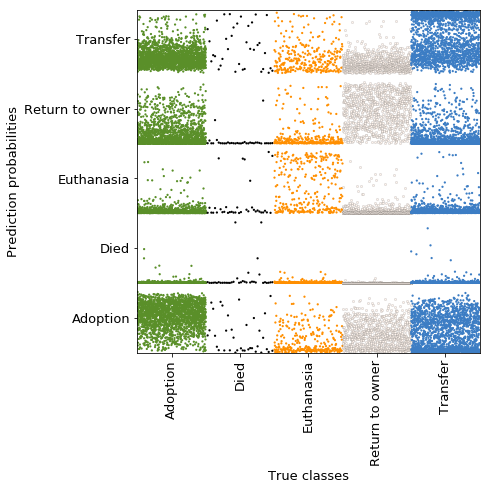

In [9]:
# run one xgboost

import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import pandas as pd
import operator
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import subplots, show
from numpy import linspace, bincount, hstack, cumsum
from numpy.random import rand, random_integers

%matplotlib inline
matplotlib.rcParams.update({'font.size': 13})

ROUNDS=2275

params = {}
params["objective"] = "multi:softprob"
params["eta"] = 0.005
# params["min_child_weight"] = 2
params["silent"] = 1
params["max_depth"] = 8
params["n_estimators"] = 300
params["colsample_by_tree"] = 0.9
params["eval_metric"] = "mlogloss"
params["subsample"] = 0.67
params["nthread"] = 1
params["seed"] = 56
params["missing"] = np.nan
#params["gamma"] = 0.3
params["num_class"] = 5

plst = list(params.items())

X = pd.read_csv("data/train_intake.csv")
df_test = pd.read_csv("data/test_intake.csv")


print 'Multiple Intakes: 1'
print '   Number of animals:',np.sum(X[X['MultipleIntakes'] == 1]['OutcomeType'].value_counts())
print '   ',1e0*X[X['MultipleIntakes'] == 1]['OutcomeType'].value_counts()/np.sum(X[X['MultipleIntakes'] == 1]['OutcomeType'].value_counts())


print 'Multiple Intakes: >1'
print '   Number of animals:',np.sum(X[X['MultipleIntakes'] > 1]['OutcomeType'].value_counts())
print '   ',1e0*X[X['MultipleIntakes'] > 1]['OutcomeType'].value_counts()/np.sum(X[X['MultipleIntakes'] > 1]['OutcomeType'].value_counts())


y = X['OutcomeType'].values
X.drop(['AnimalID','OutcomeType'], axis=1, inplace=True)

id_test = df_test['ID'].values
df_test.drop(['ID','AnimalID'], axis=1, inplace=True)

min_val = X.min()
max_val = X.max()

# scale the features - important for feature importance
X = (X - min_val)/(max_val-min_val)
df_test = (df_test - min_val)/(max_val-min_val)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

xgtrain = xgb.DMatrix(X_train.values, label=y_train, feature_names=X_train.columns,missing=np.nan)
xgval = xgb.DMatrix(X_valid.values, label=y_valid, feature_names=X_train.columns,missing=np.nan)

watchlist = [(xgtrain, 'train'),(xgval, 'val')]
model = xgb.train(plst, xgtrain, ROUNDS, watchlist, early_stopping_rounds=60 )

model = xgb.train(plst, xgtrain, ROUNDS )
y_val = model.predict(xgval)

xgtrain = xgb.DMatrix(X.values, label=y,missing=np.nan)
model = xgb.train(plst, xgtrain, ROUNDS )

xgtest = xgb.DMatrix(df_test.values,missing=np.nan)
y_pred = model.predict(xgtest)


adopt = []
died = []
euth = []
rto = []
transfer = []

for row in y_pred:
    adopt.append(row[0])    
    died.append(row[1])
    euth.append(row[2])
    rto.append(row[3])
    transfer.append(row[4])

# AnimalID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
pd.DataFrame({"ID": id_test, "Adoption": adopt, "Died": died, "Euthanasia": euth, "Return_to_owner": rto, "Transfer": transfer}).to_csv(
    'result/XGB_intake_sd_type_age_abs.csv',index=False, columns=["ID", "Adoption", "Died", "Euthanasia", "Return_to_owner", "Transfer"])


# confusion matrix with probabilities

def confusion_probs(predictions, labels, ax = None, vmargin = 0.1, equalize = False, cmap = cm.jet, colors = [],ticklabels=[]):
    """
        Make a confusion-matrix-like scatter plot
    """
    N, D = predictions.shape
    bins = bincount(labels)
    assert labels.min() >= 0 and labels.max() < D, 'labels should be between 0 and {0:d}'.format(D - 1)
    assert predictions.min() >= 0 and predictions.max() <= 1, 'predictions should be normalized (to [0, 1])'
    """ Set up graphical stuff. """
    fig = None
    if ax is None:
        fig, ax = subplots(figsize = (7, 7))
        fig.tight_layout()
    if equalize:
        xticks = [x + .5 for x in range(D)]
        bin_left = range(D)
        bin_right = range(1,D+1)
    else:
        xticks = (float(D) / N) * (cumsum(bins) - bins / 2)
        bin_left = (float(D) / N) * (cumsum(bins) - bins)
        bin_right = (float(D) / N) * (cumsum(bins))
        
    ax.set_xticks(xticks)
    if len(ticklabels) == 0:
        ax.set_xticklabels(range(D))
    else:
        ax.set_xticklabels(ticklabels,rotation=90)
        
    ax.set_xlim([0, D])
    ax.set_yticks([(x + .5) * (1 + vmargin) for x in range(D)])
    if len(ticklabels) == 0:
        ax.set_yticklabels(range(D))
    else:
        ax.set_yticklabels(ticklabels)
    
    
    ax.set_ylim([0, D * (1 + vmargin) - vmargin])
    ax.set_xlabel('True classes')
    ax.set_ylabel('Prediction probabilities')
    """ Sort predictions by label. """
    indices = labels.argsort()
    X = predictions[indices, :]
    y = labels[indices]
    """ Add more vertical offset to higher labels. """
    X += linspace(0, D - 1, D) * (1 + vmargin)
    """ Make a new horizontal axis to give all samples equal width. """
    if equalize:
        z = hstack([k + linspace(0, 1, t) for k, t in enumerate(bins)])
    else:
        z = linspace(0, D, N)
    """ Plot the results with class-coding. """
    if len(colors) == 0:
        colors = []
        for q in range(D):
            colors.append(cmap(y / float(D)))
    for q in range(D):
        row = X[:, q]
        for qq in range(D):
            if qq == 3:
                ax.scatter(z[(z > bin_left[qq])&(z<bin_right[qq])], row[(z > bin_left[qq])&(z<bin_right[qq])], c = colors[qq], edgecolors = 'k',linewidth=0.1,s=5)
            else:
                ax.scatter(z[(z > bin_left[qq])&(z<bin_right[qq])], row[(z > bin_left[qq])&(z<bin_right[qq])], c = colors[qq],edgecolor='None',s=5)
    plt.tight_layout()
    return (fig, ax) if fig else ax

colors = ['#5A8F29','k','#FF8F00','#FFF5EE','#3C7DC4']
ticklabels = ['Adoption','Died','Euthanasia','Return to owner','Transfer']
fig, ax = confusion_probs(y_val, y_valid, equalize = True,colors = colors,ticklabels = ticklabels)
fig.savefig('figures/conf_mat_probs_equalized.png')

In [17]:
# feature importance
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()
    
create_feature_map(list(df_test.columns.values))

In [20]:
importance = model.get_fscore(fmap='xgb.fmap')
# importance = sorted(importance.items(), key=operator.itemgetter(1))

# df = pd.DataFrame(importance, columns=['feature', 'fscore'])
# df['fscore'] = df['fscore'] / df['fscore'].sum()

# fscore = np.array(df['fscore'])
# features = np.array(df['feature'])


# plt.figure(figsize=(15,5))
# plt.title("Feature importances")
# plt.bar(range(len(fscore)), fscore[::-1],
#        color="r", align="center")
# plt.xticks(range(len(fscore)), features[::-1],rotation=90)
# plt.xlim([-1, len(fscore)])
# plt.tight_layout()
# plt.savefig('figures/feature_importance_sd_xgb.png',dpi=150)
# plt.show()
# plt.close()

XGBoostError: [00:09:14] include/xgboost/././feature_map.h:83: unknown feature type, use i for indicator and q for quantity

## Grid Search + K-Fold Cross Validation

In [ ]:
# randomized search with xgb

import xgboost as xgb
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import StratifiedKFold
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import pickle
import numpy as np
import pandas as pd

X = pd.read_csv("data/train_intake.csv")

Y = X['OutcomeType'].values
X.drop(['AnimalID','OutcomeType'], axis=1, inplace=True)

n_iter = 1000
k_fold = 5

i = 0

cv = StratifiedKFold(Y,n_folds=k_fold,shuffle=True)

# initialize the classifier

GB = xgb.XGBClassifier()

param_grid = {"max_depth": sp_randint(1, 90),
              "learning_rate": sp_uniform(loc=0e0,scale=1e0),
              "objective":['multi:softprob'],
              "nthread": [8],
              "missing": [np.nan],
              "reg_alpha": [0.01,0.017782794,0.031622777,0.056234133,\
                            0.1,0.17782794,0.31622777,0.56234133,1.,1.77827941,\
                            3.16227766,5.62341325,10.,\
                            17.7827941,31.6227766,56.2341325,100.],
              "colsample_bytree": sp_uniform(loc=0.2e0,scale=0.8e0),
              "subsample": sp_uniform(loc=0.2e0,scale=0.8e0),
              "n_estimators": sp_randint(50, 200)}

search_GB = RandomizedSearchCV(GB,param_grid,scoring='log_loss',n_iter=n_iter,cv=cv,verbose=True).fit(X,Y)
print '   new features:'
print '   ',search_GB.best_score_
print '   ',search_GB.best_params_



# save the results
f_name = open('param_files/xgboost_RSCV_intake_niter'+str(n_iter)+'_kfold'+str(k_fold)+'.dat','w')
pickle.dump([search_GB.grid_scores_],f_name)
f_name.close()

i = i + 1

## Plot randomized search results

In [ ]:
# plot randomized search results

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 13})
import pickle
from sklearn.gaussian_process import GaussianProcess
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn import cross_validation

def isFloat(s):
    # check whether a string is a float
    try: 
        float(s)
        return True
    except ValueError:
        return False 

n_iter = 1000
k_fold = 5

# open the results
f = open('param_files/xgboost_RSCV_intake_niter'+str(n_iter)+'_kfold'+str(k_fold)+'.dat','r')
[grid_scores_] = pickle.load(f)
f.close()

# collect all grid points and scores
grid_coords = np.zeros([len(grid_scores_),len(grid_scores_[0][0])-2])
scores = np.zeros([len(grid_scores_),len(grid_scores_[0][2])])
for i in range(len(grid_scores_)):
    grid = grid_scores_[i][0]
    keys = grid_scores_[i][0].keys()    
    del keys[2]
    del keys[3]
    del keys[-2]
    for j in range(len(keys)):
        grid_coords[i,j] = grid[keys[j]]
    scores[i,:] = grid_scores_[i][2][:]

# plot the mean and std scores as a function of all grid coordinates
plt.figure(figsize=(12,6))

to_plot = -np.mean(scores,axis=1)

for i in range(len(keys)):
    plt.subplot(2, 3, i+1)
    plt.plot(grid_coords[:,i],to_plot,'bo',markersize=5,mew=1)
    plt.plot(grid_coords[to_plot == np.min(to_plot),i],to_plot[to_plot == np.min(to_plot)],'ro',markersize=8,mew=1)
    plt.xlabel(keys[i])
    plt.ylabel('scores')
    plt.ylim([0.8,1.0])
    if keys[i] == 'reg_alpha':
        plt.semilogx()
plt.tight_layout()
plt.savefig('figures/gridsearch_XGB_intake_niter'+str(n_iter)+'_kfold'+str(k_fold)+'.png',dpi=150)
plt.savefig('figures/gridsearch_XGB_intake_niter'+str(n_iter)+'_kfold'+str(k_fold)+'.pdf')
plt.show()
plt.close()

## Create submission file

In [ ]:
# create submission files
# calculate the average of the top N XGBs
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 13})
import pickle
from sklearn.gaussian_process import GaussianProcess
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn import cross_validation
import csv
import itertools
import random

def isFloat(s):
    # check whether a string is a float
    try: 
        float(s)
        return True
    except ValueError:
        return False 


# nr of xgb's to average over
nr_xgb = [1,10,20,30,40,50,60,70,80,90,100]

with open('result/sample_submission.csv', 'rb') as f:
    reader = csv.reader(f)
    header = reader.next()


X = pd.read_csv("test-train_files/train_intake.csv")

Y = X['OutcomeType'].values
X.drop(['AnimalID','OutcomeType'], axis=1, inplace=True)


X_test = pd.read_csv("test-train_files/test_intake.csv")
X_test.drop(['ID','AnimalID'], axis=1, inplace=True)


# obtain the grid parameters
f = open('param_files/xgboost_RSCV_intake_niter'+str(n_iter)+'_kfold'+str(k_fold)+'.dat','r')
[grid_scores_] = pickle.load(f)
f.close()

# collect all grid points and scores
grid_coords = np.zeros([len(grid_scores_),len(grid_scores_[0][0])-2])
scores = np.zeros([len(grid_scores_),len(grid_scores_[0][2])])
for i in range(len(grid_scores_)):
    grid = grid_scores_[i][0]
    keys = grid_scores_[i][0].keys()

    del keys[2]
    del keys[3]
    del keys[5]

    for j in range(len(keys)):
        grid_coords[i,j] = grid[keys[j]]
    scores[i,:] = grid_scores_[i][2][:]

mean_scores = -np.mean(scores,axis=1)
indx_sort = np.argsort(mean_scores)


Y_tests = []

for i in range(np.max(nr_xgb)):
    coord = grid_coords[indx_sort[i]]

    print '  ',i,' grid coordinates: ',coord

    GB = xgb.XGBClassifier(reg_alpha=coord[0], colsample_bytree=coord[1], learning_rate=coord[2], \
                       n_estimators=int(coord[3]), subsample=coord[4], max_depth=coord[5],\
                       objective='multi:softprob',nthread=3).fit(X,Y,eval_metric='mlogloss')
    Y_test_col = GB.predict_proba(X_test)

    Y_tests.append(Y_test_col)

Y_test = np.zeros(np.shape(Y_test_col))

for nr in nr_xgb:
    for i in range(nr):
        Y_test = Y_test + Y_tests[i]
    coord = grid_coords[0]
    # write the submission file
    file_name = 'XGB_intake_ensemble'+str(nr)+'_'+'_'.join([str(coord[p]) for p in range(len(coord))])+'.csv'
    print '   ',file_name
    with open('result/'+file_name, 'wb') as csvfile:
        writer = csv.writer(csvfile,dialect='excel')
        writer.writerow(header)
        # loop through the animals
        for i in range(np.shape(X_test)[0]):            
            writer.writerow(list(itertools.chain.from_iterable([[i+1],Y_test[i,:]])))

    print '   done'